In [4]:
import pandas as pd
import numpy as np
from google.cloud import bigquery
client = bigquery.Client()
from Predicting_Purchase_Intention.utils.get_data import get_raw_data
from Predicting_Purchase_Intention.utils.clean_data import drop_cols, clean_data
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
test_df = pd.read_csv('../raw_data/test_3days_dataset.csv')

In [5]:
test_df['scroll & Search Results'].max()

6.0

In [15]:
test_df['add_shipping_info & Other'].min()

1.0

In [59]:
var = [1,2,3,4]

In [60]:
var.remove(2)

In [61]:
var

[1, 3, 4]

/home/laoluibs/.pyenv/versions/3.8.12/envs/project_lewagon_PPI/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/laoluibs/.pyenv/versions/3.8.12/envs/project_lewagon_PPI/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/laoluibs/.pyenv/versions/3.8.12/envs/project_lewagon_PPI/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/laoluibs/.pyenv/versions/3.8.12/envs/project_lewagon_PPI/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pa

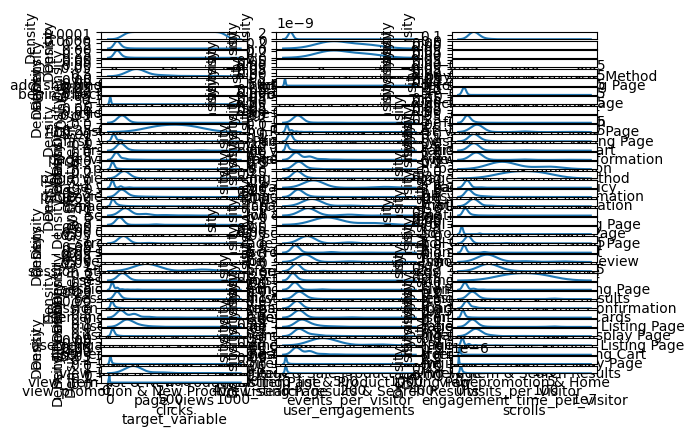

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

for i, column in enumerate(test_df.columns, 1):
    plt.subplot(40,3,i)
    sns.kdeplot(test_df[column]).tick_params(bottom=False)

In [17]:
norm_list = [5,8,31,45,48,62,76,81,98]
norm_list_col = []
for index,num in enumerate(test_df.columns):
    for col in norm_list:
        if col == index:
            norm_list_col.append(num)
    

In [19]:
nu_df = test_df[norm_list_col]

In [20]:
nu_df

,add_to_cart & Product Listing Page,click & Home,page_view & Home,scroll & Checkout Review,scroll & Home,session_start & Checkout Review,session_start & Shopping Cart,user_engagement & Home,view_item & Search Results
0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.0,NaN
1,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
4,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9824,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN
9825,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN


/home/laoluibs/.pyenv/versions/3.8.12/envs/project_lewagon_PPI/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/laoluibs/.pyenv/versions/3.8.12/envs/project_lewagon_PPI/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/laoluibs/.pyenv/versions/3.8.12/envs/project_lewagon_PPI/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


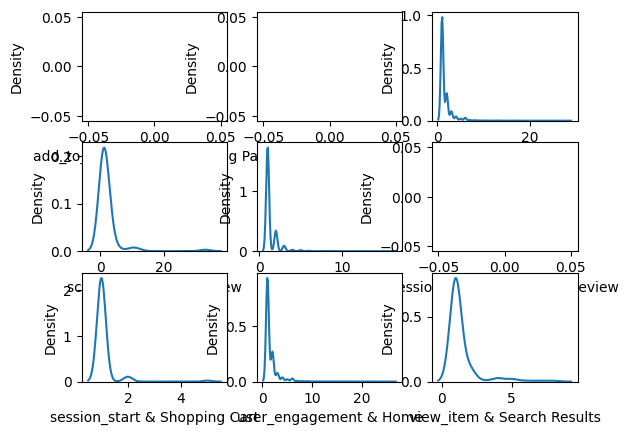

In [21]:
for i, column in enumerate(nu_df.columns, 1):
    plt.subplot(3,3,i)
    sns.kdeplot(test_df[column])

In [40]:
# outliers=[]
# for num in test_df.columns:
#     print(test_df[num].max() - test_df[num].mean(), test_df[num].mean() - test_df[num].min())


In [31]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return len(outliers)

In [32]:
find_outliers_IQR(test_df['target_variable'])

97

In [33]:
num_outliers = []
for num in test_df.columns:
    num_outliers.append(find_outliers_IQR(test_df[num]))

In [35]:
sum(num_outliers)

13975

In [ ]:
test_df['target_variable'].

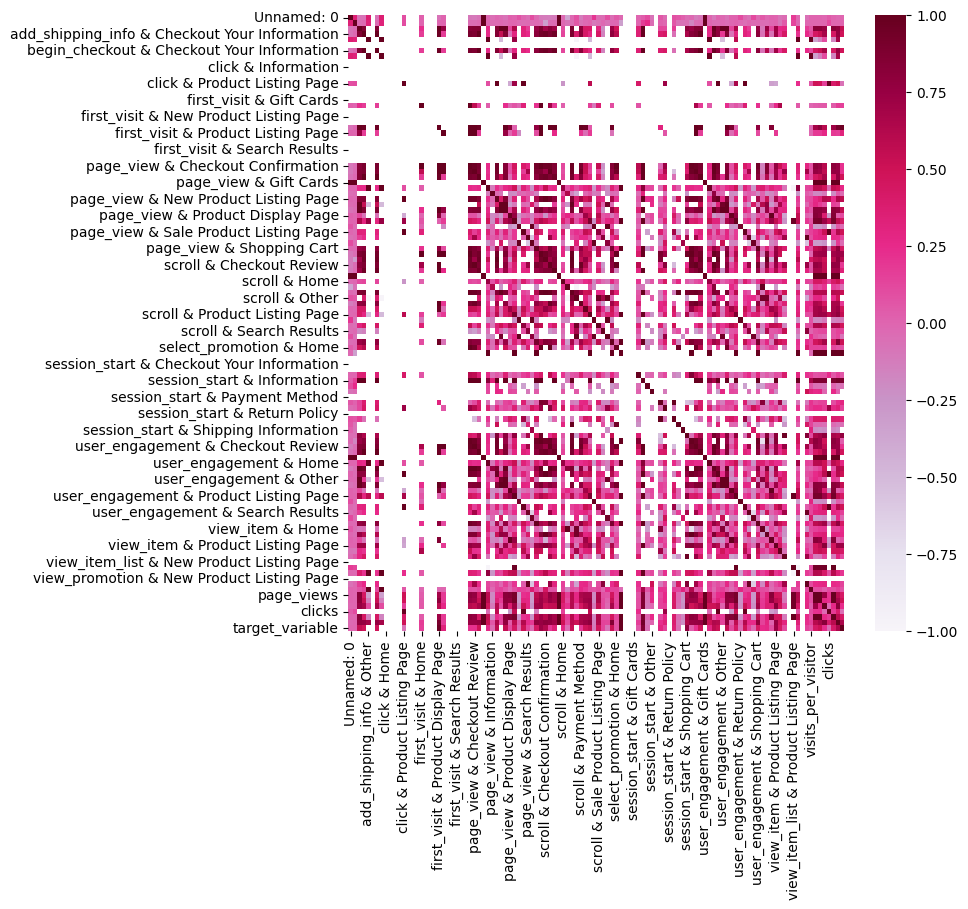

In [16]:
plt.figure(figsize=(8,8))

sns.heatmap(test_df.corr(),
            cmap='PuRd');

In [3]:
# for num in test_df.columns:
#     print(num)

In [6]:
col_drop = []
for num in test_df.columns:
    if (test_df[num].isnull().sum()/len(test_df)*100) > 95 and 'payment' not in num.lower():
        col_drop.append(num)

test_df = test_df.drop(columns =col_drop)
#drop columns with more than 95% missing values

list_y = list(set(test_df['target_variable'].values)) #unique values in the target variable
list_y.remove(0)
#dependent on what we eventually agree as the main class for the precision target
test_df['target_variable'] = test_df['target_variable'].replace(to_replace=list_y, value = -1)\
.replace(to_replace=0, value = 1).replace(to_replace=-1, value = 0)


In [7]:
X = test_df.drop(columns = ['target_variable', 'user_pseudo_id', 'Unnamed: 0'])
y = test_df['target_variable']

In [18]:
X.engagement_time_per_visitor

0        51314.0
1        84553.0
2         9215.0
3        32694.0
4           53.0
          ...   
9822    105687.0
9823         0.0
9824      7417.0
9825     12278.0
9826     79215.0
Name: engagement_time_per_visitor, Length: 9827, dtype: float64

In [91]:
# X = X.fillna(0)

1

In [10]:
num_transformer = make_pipeline(
    SimpleImputer(),
    MinMaxScaler())

preproc_baseline = make_column_transformer(
    (num_transformer, make_column_selector(dtype_include=["int64", "float64"])),
    remainder = 'drop')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [47]:
model1 = LinearSVC()
pipe_baseline = make_pipeline(preproc_baseline, model1)
pipe_baseline.fit(X_train,y_train)
scores = cross_validate(pipe_baseline, X_test, y_test, cv=5, scoring=['precision','f1'])


scores['test_f1'].mean(), scores['test_precision'].mean()

(0.9955666173050688, 0.9921872083280799)

In [29]:
y.max()

1054

In [48]:
model2 = KNeighborsClassifier(n_neighbors=2)
pipe_baseline = make_pipeline(preproc_baseline, model2)
pipe_baseline.fit(X_train,y_train)
scores = cross_validate(pipe_baseline, X_test, y_test, cv=5, scoring=['precision','f1'])


scores['test_f1'].mean(), scores['test_precision'].mean()

(0.9950363972207855, 0.9948774518513005)

In [49]:
model4 = DecisionTreeClassifier()

pipe_baseline = make_pipeline(preproc_baseline, model4)
pipe_baseline.fit(X_train,y_train)
scores = cross_validate(pipe_baseline, X_test, y_test, cv=5, scoring=['precision','f1'])

scores['test_f1'].mean(), scores['test_precision'].mean()

(0.9969198566568723, 0.9969213126861962)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [48]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train,y_train,random_state=42)

In [49]:
X_train_preproc = preproc_baseline.fit_transform(X_train, y_train)
X_eval_preproc = preproc_baseline.transform(X_eval)

In [50]:
model_xgb = XGBClassifier(max_depth=10, n_estimators=500, learning_rate=0.1)

In [51]:
model_xgb.fit(X_train_preproc, y_train,
        verbose=False,
        eval_set=[(X_train_preproc, y_train), (X_eval_preproc, y_eval)],
        early_stopping_rounds=20)

/home/laoluibs/.pyenv/versions/3.8.12/envs/project_lewagon_PPI/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [52]:
y_pred = model_xgb.predict(preproc_baseline.transform(X_test))

In [53]:
from sklearn.metrics import precision_score

In [54]:
precision_score(y_test, y_pred)

0.9982835564709921

/home/laoluibs/.pyenv/versions/3.8.12/envs/project_lewagon_PPI/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/laoluibs/.pyenv/versions/3.8.12/envs/project_lewagon_PPI/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBoostError: [11:12:51] ../src/metric/metric.cc:49: Unknown metric function precision
Stack trace:
  [bt] (0) /home/laoluibs/.pyenv/versions/3.8.12/envs/project_lewagon_PPI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x26788d) [0x7f9c3088388d]
  [bt] (1) /home/laoluibs/.pyenv/versions/3.8.12/envs/project_lewagon_PPI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x267a51) [0x7f9c30883a51]
  [bt] (2) /home/laoluibs/.pyenv/versions/3.8.12/envs/project_lewagon_PPI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x22b4cb) [0x7f9c308474cb]
  [bt] (3) /home/laoluibs/.pyenv/versions/3.8.12/envs/project_lewagon_PPI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(XGBoosterBoostedRounds+0x31) [0x7f9c306d9261]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.7(+0x6ff5) [0x7f9c9ff00ff5]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.7(+0x640a) [0x7f9c9ff0040a]
  [bt] (6) /home/laoluibs/.pyenv/versions/3.8.12/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(_ctypes_callproc+0x5f6) [0x7f9c9ff24366]
  [bt] (7) /home/laoluibs/.pyenv/versions/3.8.12/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0xc55b) [0x7f9c9ff1d55b]
  [bt] (8) /home/laoluibs/.pyenv/versions/3.8.12/envs/project_lewagon_PPI/bin/python(_PyObject_MakeTpCall+0x9d) [0x5650b65bcead]



In [27]:
cross_validate(pipe_xgb,X,y,cv=5,scoring=['precision','f1'],n_jobs=-1).mean()

NameError: name 'y_log' is not defined

In [52]:
scores = cross_validate(pipe_baseline, X_test, y_test, cv=5, scoring=['precision','f1'])

scores['test_f1'].mean(), scores['test_precision'].mean()

(0.9974334042954582, 0.9972661041015843)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier


model13 = StackingClassifier(
    estimators = [("xg", XGBClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 500)),
                  ("knn", KNeighborsClassifier(n_neighbors=2))],
    final_estimator = DecisionTreeClassifier())



pipe_baseline = make_pipeline(preproc_baseline, model13)
pipe_baseline.fit(X_train,y_train)
scores = cross_validate(pipe_baseline, X_test, y_test, cv=5, scoring=['precision','f1'])

scores['test_f1'].mean(), scores['test_precision'].mean()

(0.9958921400906483, 0.9962444950102176)

In [38]:
X = input('Enter your name:')
X

Enter your name: Laolu


'Laolu'

<AxesSubplot:>

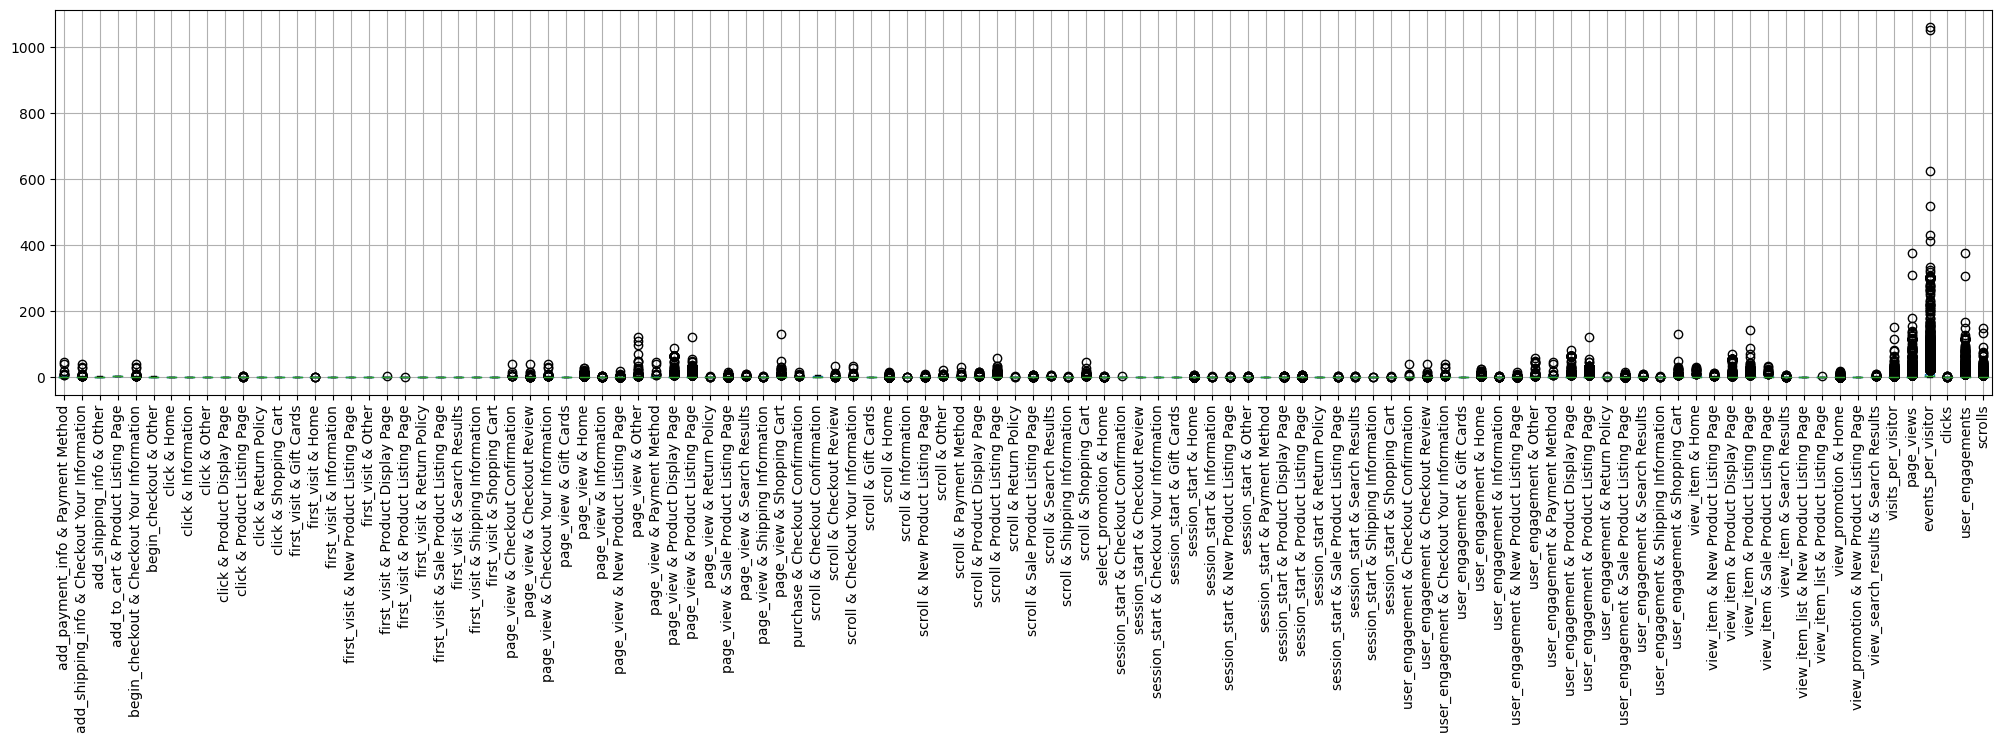

In [20]:
X.boxplot(figsize=(25,5), rot=90)

In [32]:
num_corr_threshold = 0.9

corr_num = X.corr()
corr_num_upper_triangle = corr_num.where(np.triu(np.ones(corr_num.shape),k=1).astype(np.bool)).abs()
num_col_to_drop = [column for column in corr_num_upper_triangle.columns if any(corr_num_upper_triangle[column] > num_corr_threshold)]
num_col_to_drop

/tmp/ipykernel_5188/1509102036.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_num_upper_triangle = corr_num.where(np.triu(np.ones(corr_num.shape),k=1).astype(np.bool)).abs()


['page_view & Other',
 'page_view & Payment Method',
 'scroll & Shopping Cart',
 'user_engagement & Home',
 'user_engagement & New Product Listing Page',
 'user_engagement & Other',
 'user_engagement & Payment Method',
 'user_engagement & Product Display Page',
 'user_engagement & Product Listing Page',
 'user_engagement & Sale Product Listing Page',
 'user_engagement & Shopping Cart',
 'view_item & Product Display Page',
 'page_views',
 'events_per_visitor',
 'user_engagements']

In [40]:
X = X.drop(columns = num_col_to_drop)

AttributeError: 'str' object has no attribute 'drop'

In [34]:
X.shape

(9827, 22)

In [42]:
test_df.columns

Index(['Unnamed: 0', 'user_pseudo_id', 'add_payment_info & Payment Method',
       'add_shipping_info & Checkout Your Information',
       'add_shipping_info & Other', 'add_to_cart & Product Listing Page',
       'begin_checkout & Checkout Your Information', 'begin_checkout & Other',
       'click & Home', 'click & Information',
       ...
       'view_promotion & New Product Listing Page',
       'view_search_results & Search Results', 'visits_per_visitor',
       'page_views', 'events_per_visitor', 'engagement_time_per_visitor',
       'clicks', 'user_engagements', 'scrolls', 'target_variable'],
      dtype='object', length=112)

In [43]:
list_1 = ['Unnamed: 0', 'user_pseudo_id']
list_2 = ['click & Home', 'click & Information']

In [47]:
X= test_df[list_1, list_2]

InvalidIndexError: (['Unnamed: 0', 'user_pseudo_id'], ['click & Home', 'click & Information'])

In [46]:
X

,Unnamed: 0,user_pseudo_id
0,0,1.001569e+06
1,1,1.003342e+06
2,2,1.005695e+06
3,3,1.006816e+06
4,4,1.007877e+06
...,...,...
9822,9822,9.222438e+09
9823,9823,9.273656e+09
9824,9824,9.282839e+09
9825,9825,9.466110e+09


In [1]:
random_var = 9

def test():
    return random_var

In [2]:
test()

9

In [23]:
    def find_outliers_IQR(X:pd.DataFrame) -> pd.DataFrame:
        q1=X.quantile(0.25)
        q3=X.quantile(0.75)
        IQR=q3-q1
        outliers = X[((X<(q1-1.5*IQR)) | (X>(q3+1.5*IQR)))]
        #Outliers are identified by the imbalance in their quantile differences
        return len(outliers)

    binary_col=[]
    robust_scaling_cat = []
    standard_scaling_cat = []
    for num in X.columns:
        if X[num].max() == 1 and X[num].min() == 0:
            #test to see which are categorical data of 1's and 0's
            binary_col.append(num)

        if find_outliers_IQR(X[num])>100:
            #arbitrarily set at 100 so we dont lose information in the noise--> Robust Scaler for these
            robust_scaling_cat.append(num)
        else:
            standard_scaling_cat.append(num)
            #StandardScaler for these. Normally distributed with fewer than a hundred outliers

In [24]:
threshold = 95
num_corr_threshold = threshold/100
corr_num = X[robust_scaling_cat].corr()
corr_num_upper_triangle = corr_num.where(np.triu(np.ones(corr_num.shape),k=1).astype(np.bool)).abs()
num_col_to_drop = [column for column in corr_num_upper_triangle.columns if any(corr_num_upper_triangle[column] > num_corr_threshold)]
corr_num_s = X[standard_scaling_cat].corr()
corr_num_upper_triangle_s = corr_num_s.where(np.triu(np.ones(corr_num_s.shape),k=1).astype(np.bool)).abs()
num_col_to_drop_s = [column for column in corr_num_upper_triangle_s.columns if any(corr_num_upper_triangle_s[column] > num_corr_threshold)]

/tmp/ipykernel_645/1257747604.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_num_upper_triangle = corr_num.where(np.triu(np.ones(corr_num.shape),k=1).astype(np.bool)).abs()
/tmp/ipykernel_645/1257747604.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_num_upper_triangle_s = corr_num_s.where(np.triu(np.ones(corr_num_s.shape),k=1).a

In [25]:
num_col_to_drop_s

['page_view & Other',
 'page_view & Payment Method',
 'user_engagement & Other',
 'user_engagement & Payment Method',
 'user_engagement & Shopping Cart']